In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Load Excel file
file_path = "Purchase data.xlsx"

df = pd.read_excel(file_path, sheet_name="Sheet1")

A = df.iloc[:, 1:-1].values
C = df.iloc[:, -1].values

#Convert to float
A = A.astype(float)
C = C.astype(float)

rank_A = np.linalg.matrix_rank(A)
print("Rank of Matrix A:", rank_A)

#Compute pseudo-inverse of A
A_pinv = np.linalg.pinv(A)
X = np.dot(A_pinv, C)
print("Model Vector X:", X)

#Categorize customers as "RICH" or "POOR"
df["Category"] = np.where(df.iloc[:, -1] > 200, "RICH", "POOR")
print("\nUpdated Data with Categories:\n", df.head())

X_features = df.iloc[:, 1:-2].values
y_labels = df["Category"].values

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

#Train a classifier (Random Forest)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))


Rank of Matrix A: 3
Model Vector X: [ 1. 55. 18.]

Updated Data with Categories:
   Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Category
0      C_1           20             6                 2           386     RICH
1      C_2           16             3                 6           289     RICH
2      C_3           27             6                 2           393     RICH
3      C_4           19             1                 2           110     POOR
4      C_5           24             4                 2           280     RICH
Classification Accuracy: 0.5


Mean of Price: 1560.663453815261
Variance of Price: 58732.365352539186
Mean of Price on Wednesdays: 1550.706
Population mean: 1560.663453815261
Mean of Price in April: 1698.9526315789474
Population mean: 1560.663453815261
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making profit given today is Wednesday: 0.42


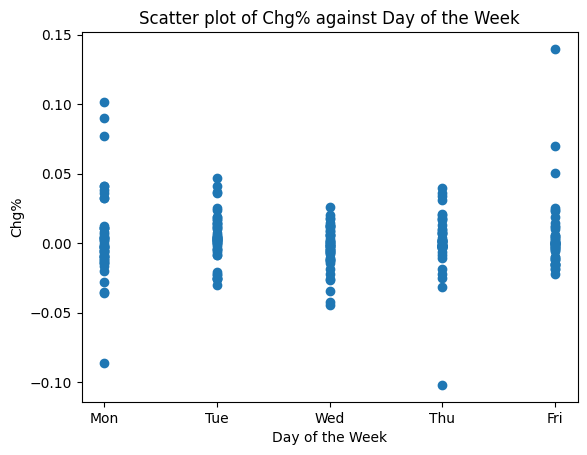

In [2]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

#Load data
df = pd.read_excel('IRCTC Stock Price.xlsx', sheet_name='Sheet1')

#Calculate mean and variance of the Price column
price_mean = statistics.mean(df['Price'])
price_variance = statistics.variance(df['Price'])

print(f"Mean of Price: {price_mean}")
print(f"Variance of Price: {price_variance}")
wednesdays_data = df[df['Day'] == 'Wed']
wednesdays_mean = statistics.mean(wednesdays_data['Price'])

print(f"Mean of Price on Wednesdays: {wednesdays_mean}")
print(f"Population mean: {price_mean}")

april_data = df[df['Month'] == 'Apr']
april_mean = statistics.mean(april_data['Price'])

print(f"Mean of Price in April: {april_mean}")
print(f"Population mean: {price_mean}")

loss_probability = len(df[df['Chg%'] < 0]) / len(df)

print(f"Probability of making a loss: {loss_probability}")

wednesdays_profit_data = wednesdays_data[wednesdays_data['Chg%'] > 0]
wednesdays_profit_probability = len(wednesdays_profit_data) / len(wednesdays_data)

print(f"Probability of making a profit on Wednesday: {wednesdays_profit_probability}")

conditional_probability = len(wednesdays_profit_data) / len(wednesdays_data)

print(f"Conditional probability of making profit given today is Wednesday: {conditional_probability}")

#Maping days to numerical values for plotting
day_map = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5}
df['Day_num'] = df['Day'].map(day_map)

#Scatter plot
plt.scatter(df['Day_num'], df['Chg%'])
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Scatter plot of Chg% against Day of the Week')
plt.xticks(list(day_map.values()), list(day_map.keys()))
plt.show()

Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured   

<ipython-input-3-cc87561e716b>:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0]).infer_objects(copy=False)


Normalization complete. Data saved as 'normalized_thyroid_data.csv'.

Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85

Cosine Similarity: 0.9999999968143457


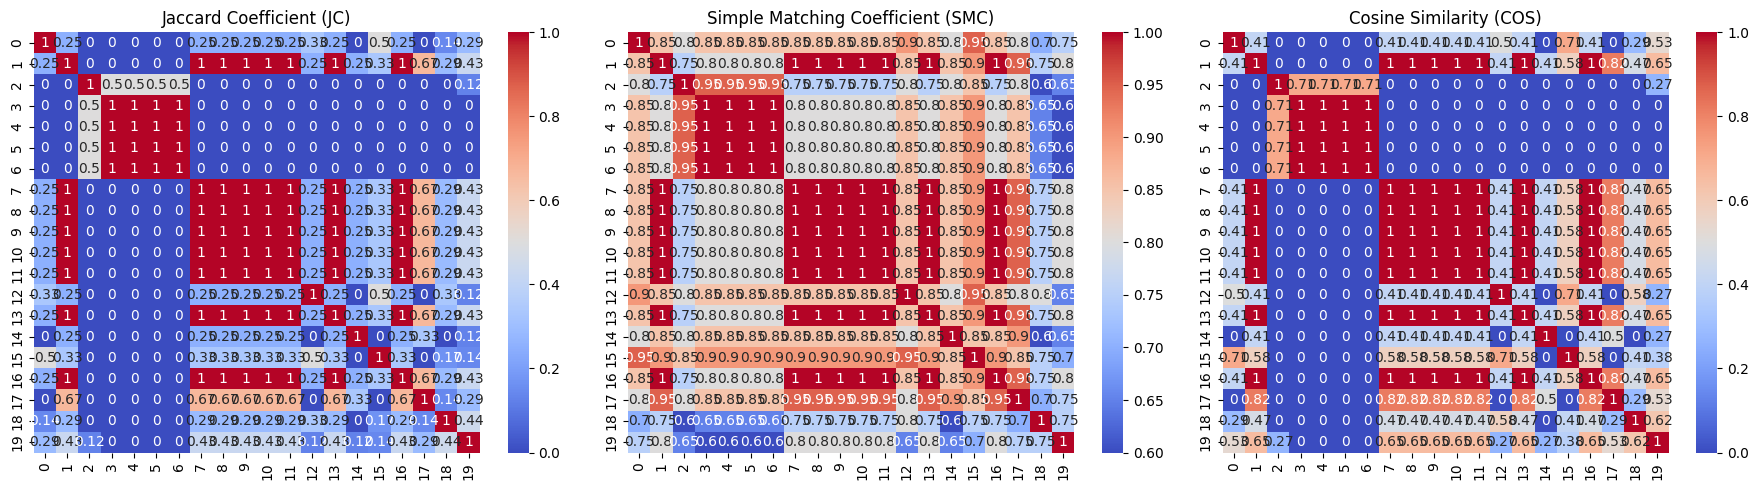

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

#Load Dataset
df = pd.read_excel("thyroid0387_UCI.xlsx", sheet_name="Sheet1")
df.replace("?", pd.NA, inplace=True)

#A5: Data Exploration
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))

categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\nRange of Numeric Variables:\n", df[numeric_columns].max() - df[numeric_columns].min())

#Study the presence of missing values in each attribute
print("\nMissing Values:\n", df.isnull().sum())

#Study presence of outliers in data
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers:\n", outliers)

#For numeric variables, calculate the mean and variance
print("\nMean:\n", df[numeric_columns].mean())
print("\nVariance:\n", df[numeric_columns].var())

#A6: Data Imputation
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if col in numeric_columns:
            if outliers[col] > 0:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0]).infer_objects(copy=False)

#A7: Data Normalization
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.to_csv('Normalized_thyroid_dataset.csv')
print("Normalization complete. Data saved as 'normalized_thyroid_data.csv'.")

#A8: Similarity Measure(JC and SMC)
binary_columns = [
    "on thyroxine", "query on thyroxine", "on antithyroid medication",
    "sick", "pregnant", "thyroid surgery", "I131 treatment",
    "query hypothyroid", "query hyperthyroid", "lithium", "goitre",
    "tumor", "hypopituitary", "psych", "TSH measured", "T3 measured",
    "TT4 measured", "T4U measured", "FTI measured", "TBG measured"
]

#Convert t= 1 and f = 0
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'t': 1, 'f': 0}))

#Select the first 2 observation vectors
vec1, vec2 = df.iloc[0][binary_columns], df.iloc[1][binary_columns]

#Compute JC and SMC
f11 = sum((vec1 == 1) & (vec2 == 1))
f00 = sum((vec1 == 0) & (vec2 == 0))
f10 = sum((vec1 == 1) & (vec2 == 0))
f01 = sum((vec1 == 0) & (vec2 == 1))

jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0

print("\nJaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

#A9: Cosine Similarity Measure
#Select only Numeric columns for Cosine Similarity
vec1_numeric = df.iloc[0][numeric_columns]
vec2_numeric = df.iloc[1][numeric_columns]

#Calculate cosine similarity
cosine_sim = cosine_similarity([vec1_numeric], [vec2_numeric])[0][0]
print("\nCosine Similarity:", cosine_sim)

#A10: Heatmap Plot
df_subset = df.iloc[:20][binary_columns]

#Initialize matrices for JC, SMC, and COS
n = df_subset.shape[0]
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cosine_matrix = np.zeros((n, n))

#Compute Similarity Measures
for i in range(n):
    for j in range(n):
        vec1, vec2 = df_subset.iloc[i], df_subset.iloc[j]

        f11 = sum((vec1 == 1) & (vec2 == 1))
        f00 = sum((vec1 == 0) & (vec2 == 0))
        f10 = sum((vec1 == 1) & (vec2 == 0))
        f01 = sum((vec1 == 0) & (vec2 == 1))

        denominator_jc = f11 + f10 + f01
        denominator_smc = f11 + f00 + f10 + f01

        jc_matrix[i, j] = f11 / denominator_jc if denominator_jc != 0 else 0
        smc_matrix[i, j] = (f11 + f00) / denominator_smc if denominator_smc != 0 else 0

        dot_product = np.dot(vec1, vec2)
        magnitude_A = np.linalg.norm(vec1)
        magnitude_B = np.linalg.norm(vec2)
        cosine_matrix[i, j] = dot_product / (magnitude_A * magnitude_B) if magnitude_A * magnitude_B != 0 else 0

#Convert to DataFrame for Visualization
jc_df = pd.DataFrame(jc_matrix, index=df_subset.index, columns=df_subset.index)
smc_df = pd.DataFrame(smc_matrix, index=df_subset.index, columns=df_subset.index)
cosine_df = pd.DataFrame(cosine_matrix, index=df_subset.index, columns=df_subset.index)

#Plot Heatmaps
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_df, annot=True, cmap="coolwarm")
plt.title("Jaccard Coefficient (JC)")

plt.subplot(1, 3, 2)
sns.heatmap(smc_df, annot=True, cmap="coolwarm")
plt.title("Simple Matching Coefficient (SMC)")

plt.subplot(1, 3, 3)
sns.heatmap(cosine_df, annot=True, cmap="coolwarm")
plt.title("Cosine Similarity (COS)")

plt.tight_layout()
plt.show()